In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import fnmatch
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn.manifold import TSNE
import json

In [2]:
path = 'E:\Music_Notes'

In [3]:
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d .wav files in %s"%(len(files),path))

found 20 .wav files in E:\Music_Notes


In [4]:
def get_features(y, sr):
    y = y[0:sr]
    S = librosa.feature.melspectrogram(y,sr=sr, n_mels=128)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc, mode='nearest')
    delta2_mfcc = librosa.feature.delta(mfcc, order=2, mode='nearest')
    feature_vector = np.concatenate((np.mean(mfcc,1), np.mean(delta_mfcc,1), np.mean(delta2_mfcc,1)))
    feature_vector = (feature_vector-np.mean(feature_vector)) / np.std(feature_vector)
    return feature_vector

In [5]:
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
   # if i % 100 == 0:  this was because there were 6000 sounds in original dataset and printing every single is lengthy
    print("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f)
        if len(y) < 2:
            print("error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except:
        print("error loading %s" % f)
        
print("calculated %d feature vectors"%len(feature_vectors))

get 1 of 20 = E:\Music_Notes\A.wav
get 2 of 20 = E:\Music_Notes\B.wav
get 3 of 20 = E:\Music_Notes\Bb.wav
get 4 of 20 = E:\Music_Notes\C.wav
get 5 of 20 = E:\Music_Notes\C1.wav
get 6 of 20 = E:\Music_Notes\cello.wav
get 7 of 20 = E:\Music_Notes\C_s.wav
get 8 of 20 = E:\Music_Notes\C_s1.wav
get 9 of 20 = E:\Music_Notes\D.wav
get 10 of 20 = E:\Music_Notes\D1.wav
get 11 of 20 = E:\Music_Notes\D_s.wav
get 12 of 20 = E:\Music_Notes\D_s1.wav
get 13 of 20 = E:\Music_Notes\E.wav
get 14 of 20 = E:\Music_Notes\E1.wav
get 15 of 20 = E:\Music_Notes\F.wav
get 16 of 20 = E:\Music_Notes\F1.wav
get 17 of 20 = E:\Music_Notes\F_s.wav
get 18 of 20 = E:\Music_Notes\G.wav
get 19 of 20 = E:\Music_Notes\gun.wav
get 20 of 20 = E:\Music_Notes\G_s.wav
calculated 20 feature vectors


In [6]:
model = TSNE(n_components=2, learning_rate=150, perplexity=2, verbose=2, angle=0.1).fit_transform(feature_vectors)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.033s...
[t-SNE] Computed neighbors for 20 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 0.042492
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 72.0876770, gradient norm = 0.6843114 (50 iterations in 0.040s)
[t-SNE] Iteration 100: error = 55.5489006, gradient norm = 0.3125343 (50 iterations in 0.017s)
[t-SNE] Iteration 150: error = 71.3687363, gradient norm = 0.1929698 (50 iterations in 0.025s)
[t-SNE] Iteration 200: error = 69.9757538, gradient norm = 0.6505232 (50 iterations in 0.019s)
[t-SNE] Iteration 250: error = 50.3138237, gradient norm = 0.4802206 (50 iterations in 0.019s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.313824
[t-SNE] Iteration 300: error = 0.2825561, gradient norm = 0.0027137 (50 iterations in 0.015s)
[t-SNE] Iteration 350: error = 0.2224701, gradient norm = 0.0003402 (50 it

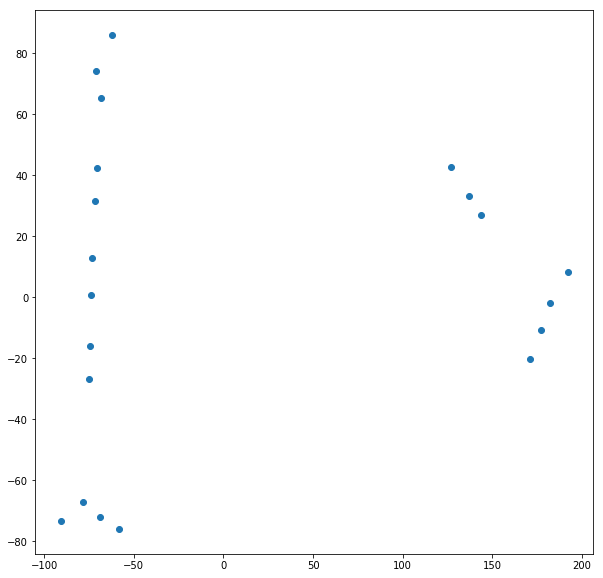

In [7]:
x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize = (10,10))
plt.scatter(x_axis, y_axis)
plt.show()

In [8]:
feature_vectors

[array([-6.157967  ,  0.38780326,  0.19605976,  0.2146348 ,  0.16156869,
         0.12885483,  0.11179245,  0.07525707,  0.085475  ,  0.11683103,
         0.10806783,  0.09985293,  0.14592811,  0.16957219,  0.16998807,
         0.16818878,  0.16660248,  0.16582645,  0.16549803,  0.16503532,
         0.16442266,  0.16411597,  0.16436495,  0.16492102,  0.1654674 ,
         0.16611667,  0.16673756,  0.16679196,  0.16678235,  0.16672347,
         0.16663267,  0.16655537,  0.16650349,  0.16645843,  0.16642483,
         0.16643447,  0.16649319,  0.16656473,  0.16661856], dtype=float32),
 array([-6.1604567 ,  0.33051923,  0.18093617,  0.17639701,  0.14920478,
         0.12408409,  0.11582036,  0.09139512,  0.09340929,  0.119465  ,
         0.1317012 ,  0.1582439 ,  0.23146313,  0.16613847,  0.16643958,
         0.16494969,  0.16348904,  0.16266203,  0.16243905,  0.16242315,
         0.16232602,  0.16218089,  0.16224352,  0.16279484,  0.16394515,
         0.16544425,  0.16385895,  0.16386974, 

In [17]:
# save results to this json file
tsne_path = "E:\example-audio-tSNE-onsets.json"
x_norm = (x_axis - np.min(x_axis)) / (np.max(x_axis) - np.min(x_axis))
y_norm = (y_axis - np.min(y_axis)) / (np.max(y_axis) - np.min(y_axis))

In [20]:

data = [{"path":os.path.abspath(f), "point":[x, y]} for f, x, y in zip(sound_paths, x_norm, y_norm)]
with open(tsne_path, 'w') as outfile:
    json.dump(data, outfile,cls=MyEncoder)
print("saved %s to disk!" % tsne_path)

AttributeError: 'numpy.float32' object has no attribute '__dict__'